In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
# load the dataset
df = pd.read_csv("data.csv")

df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

df.eq(0).sum()
mean_con = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_con_m = df[df['concave points_mean'] != 0]['concave points_mean'].mean()
mean_con_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_con_m_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_con_w = df[df['concavity_worst'] != 0]['concavity_worst'].mean()
mean_con_m_w = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

df['concavity_mean'].replace(0, mean_con, inplace=True)
df['concave points_mean'].replace(0, mean_con_m, inplace=True)
df['concavity_se'].replace(0, mean_con_se, inplace=True)
df['concave points_se'].replace(0, mean_con_m_se, inplace=True)
df['concavity_worst'].replace(0, mean_con_w, inplace=True)
df['concave points_worst'].replace(0, mean_con_m_w, inplace=True)

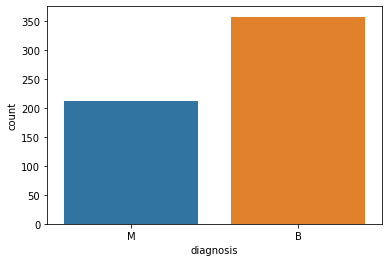

In [3]:
sns.countplot(x="diagnosis", data=df)
plt.show()

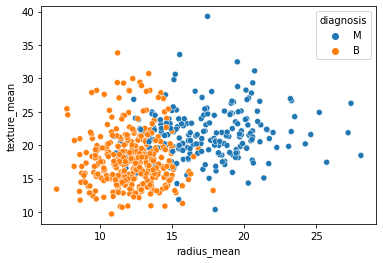

In [4]:
sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", data=df)
plt.show()

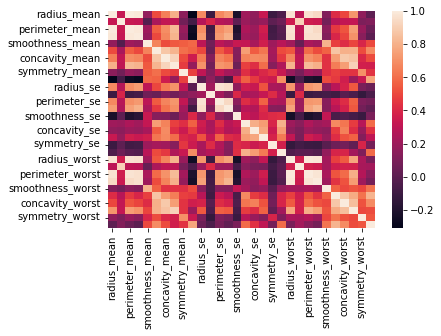

In [5]:
sns.heatmap(df.corr())
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.eq(0).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# separate the features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.410700,0.221600,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.321500,0.162800,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.340300,0.141800,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.938700,0.265000,0.4087,0.12400


In [10]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

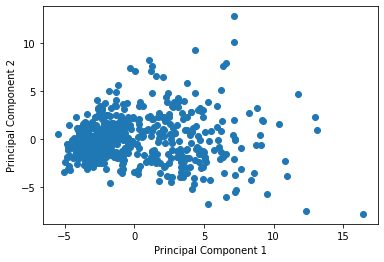

In [11]:
# dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [12]:
# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [13]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}

In [14]:
grid = GridSearchCV(SVC(), param_grid, cv=5)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [16]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.989010989010989


In [17]:
model = SVC(**grid.best_params_)

In [18]:
kfold = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(model, X_pca, y, cv=kfold)

In [19]:
print(f"Mean score: {scores.mean():.3f}")
print(f"Standard deviation: {scores.std():.3f}")

Mean score: 0.974
Standard deviation: 0.029


In [20]:
# Calculate the standard error of the mean (SEM)
sem = scores.std() / np.sqrt(len(scores))

# Calculate the 95% confidence interval
confidence_interval = norm.interval(0.95, loc=scores.mean(), scale=sem)

print(f"Confidence interval: {confidence_interval}")

Confidence interval: (0.9559832769522109, 0.9913851441004206)


The confidence interval is a statistic that proves that the model can work similarly during usage on the population from this sample of the breast cancer dataset. Our lower bound is 0.97 while our upper bound is 0.98 

In [21]:
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(scores, 1)
print(f"This is the p-value of the t-test: {p_value}")

This is the p-value of the t-test: 0.021956201836445633


In [22]:
model.fit(X_pca, y)

SVC(C=1, gamma=0.1, kernel='linear')

In [23]:
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        68
           M       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [24]:
print(confusion_matrix(y_test, y_pred))

[[68  0]
 [ 3 43]]


In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='M'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='M'):.3f}")

Accuracy: 0.974
Precision: 1.000
Recall: 0.935


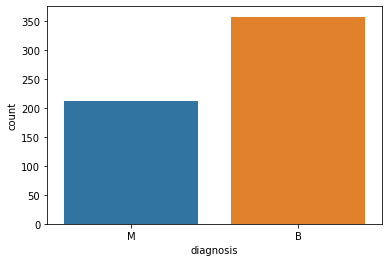

In [26]:
sns.countplot(x="diagnosis", data=df)
plt.show()

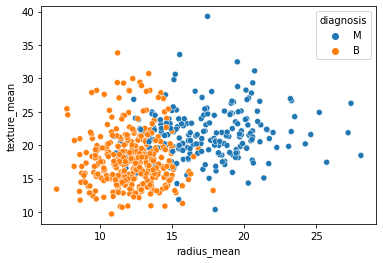

In [27]:
sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", data=df)
plt.show()